## Quantitative Analysis of Stock Market
### Loading Data of Stock Market

In [2]:
import pandas as pd

stock_data_df: pd.DataFrame = pd.read_csv("stocks.csv")
stock_data_df.sample(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
230,GOOG,2023-04-12,107.389999,107.586998,104.970001,105.220001,105.220001,22761600
97,MSFT,2023-03-29,278.959991,281.140015,278.410004,280.510010,280.510010,25087000
59,AAPL,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
25,AAPL,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
24,AAPL,2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
190,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600
236,GOOG,2023-04-20,104.650002,106.888000,104.639999,105.900002,105.900002,22515300
151,NFLX,2023-03-17,310.059998,310.760010,300.000000,303.500000,303.500000,6918800
217,GOOG,2023-03-23,105.889999,107.100998,105.410004,106.260002,106.260002,31385800
177,NFLX,2023-04-25,328.500000,328.660004,321.100006,322.549988,322.549988,5426600


## Data Cleaning and Preparation

### First Checking the Columns

In [3]:
stock_data_df.columns.unique()

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

### Check For Data Type and Missing Values

In [4]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


### Converting Date Column to its date type

In [5]:
stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])


In [6]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Data is Ready For Analysis and Visualiazation

## To Perform a Quantitative Analysis we can explore various statistical concepts
### Descriptive Statistics: Summary statistics (mean, median, standard deviation, etc.) for each stock.
### Time Series Analysis: Trends and patterns over time, especially for closing prices.
### Volatility Analysis: How much the stock price fluctuates over a period.
### Comparative Analysis: Comparing the performance of different stocks.
### Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

## Overall Descriptive Statistics


In [7]:
stock_data_df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,248,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2023-03-22 22:27:05.806451712,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
min,2023-02-07 00:00:00,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,2023-03-01 00:00:00,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,2023-03-22 12:00:00,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,2023-04-14 00:00:00,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,2023-05-05 00:00:00,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08
std,NaN,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07


## Descriptive Statistics for each stock

In [12]:
descriptive_stats = stock_data_df.groupby('Ticker')['Close'].describe()
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,158.240645,7.360485,145.309998,152.077499,158.055000,165.162506,173.570007
GOOG,62.0,100.631532,6.279464,89.349998,94.702501,102.759998,105.962503,109.459999
MSFT,62.0,275.039839,17.676231,246.270004,258.742500,275.810013,287.217506,310.649994
NFLX,62.0,327.614677,18.554419,292.760010,315.672493,325.600006,338.899994,366.829987


## Time Series Analysis
### To find Patterns and trends on closing price

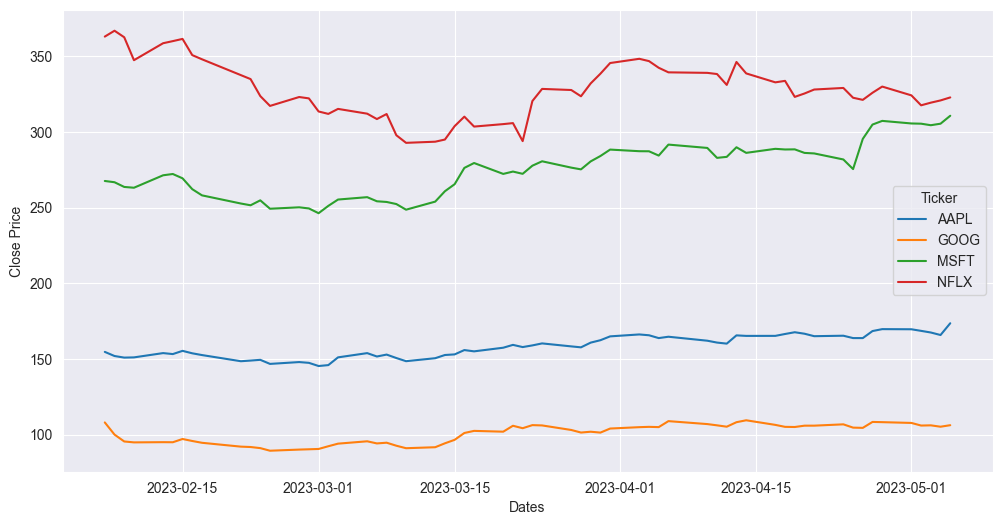

In [44]:
# Time Series Analysis
import matplotlib.pyplot as plt
import seaborn as sns

pivot_data = stock_data_df.pivot(index='Date', columns='Ticker', values='Close')

sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
plt.plot(pivot_data)
plt.ylabel("Close Price")
plt.xlabel("Dates")
plt.legend(pivot_data.columns,title='Ticker')
plt.show()

## Volatility Analysis


C:\Users\wtc\AppData\Local\Temp\ipykernel_3428\930509847.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index,y=volatility.values,palette="viridis")


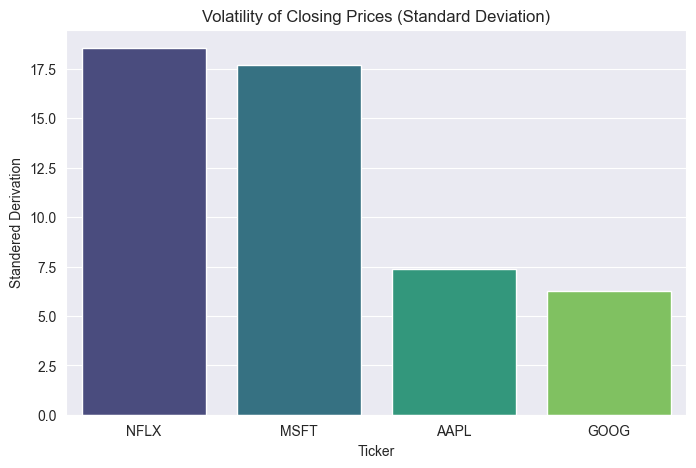

In [51]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=volatility.index,y=volatility.values,palette="viridis")
plt.xlabel("Ticker")
plt.ylabel("Standered Derivation")
plt.title("Volatility of Closing Prices (Standard Deviation)")
plt.show()

## Comparative Analysis



In [54]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

percentage_change


Ticker
AAPL    12.234086
GOOG    -1.689193
MSFT    16.104798
NFLX   -11.073151
dtype: float64

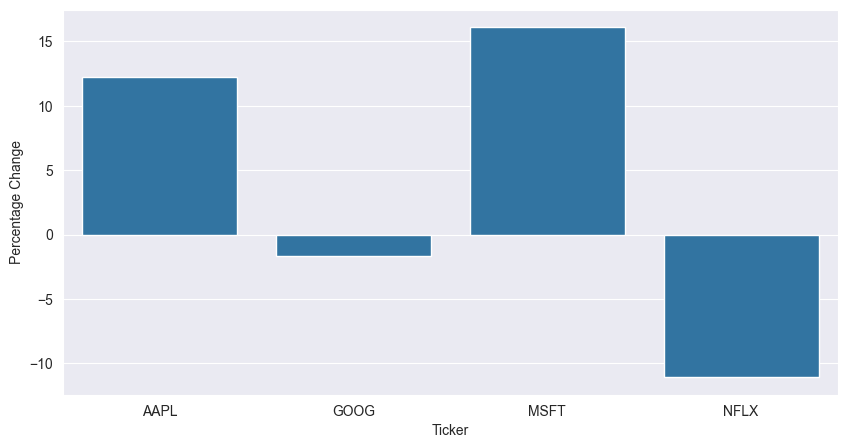

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x=percentage_change.index,y=percentage_change.values)
plt.xlabel("Ticker")
plt.ylabel("Percentage Change")
plt.show()

## Daily Risk Vs. Return Analysis


C:\Users\wtc\AppData\Local\Temp\ipykernel_3428\709083859.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(risk_return_df['Risk'][i], risk_return_df['Average Daily Return'][i],


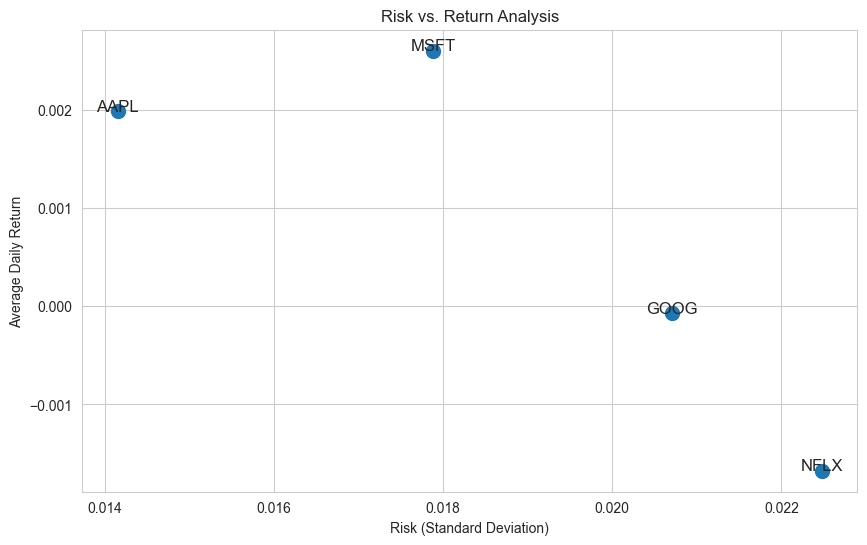

In [68]:
daily_returns = pivot_data.pct_change().dropna()

avg_daily_return = daily_returns.mean()
risk = daily_returns.std()

risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

plt.scatter(risk_return_df['Risk'], risk_return_df['Average Daily Return'], s=100)

for i in range(len(risk_return_df)):
    plt.text(risk_return_df['Risk'][i], risk_return_df['Average Daily Return'][i], 
             risk_return_df.index[i], fontsize=12, ha='center')

plt.title('Risk vs. Return Analysis')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Average Daily Return')

plt.show()
